Text(0.5, 0.98, 'Input Data')

<Figure size 432x288 with 0 Axes>

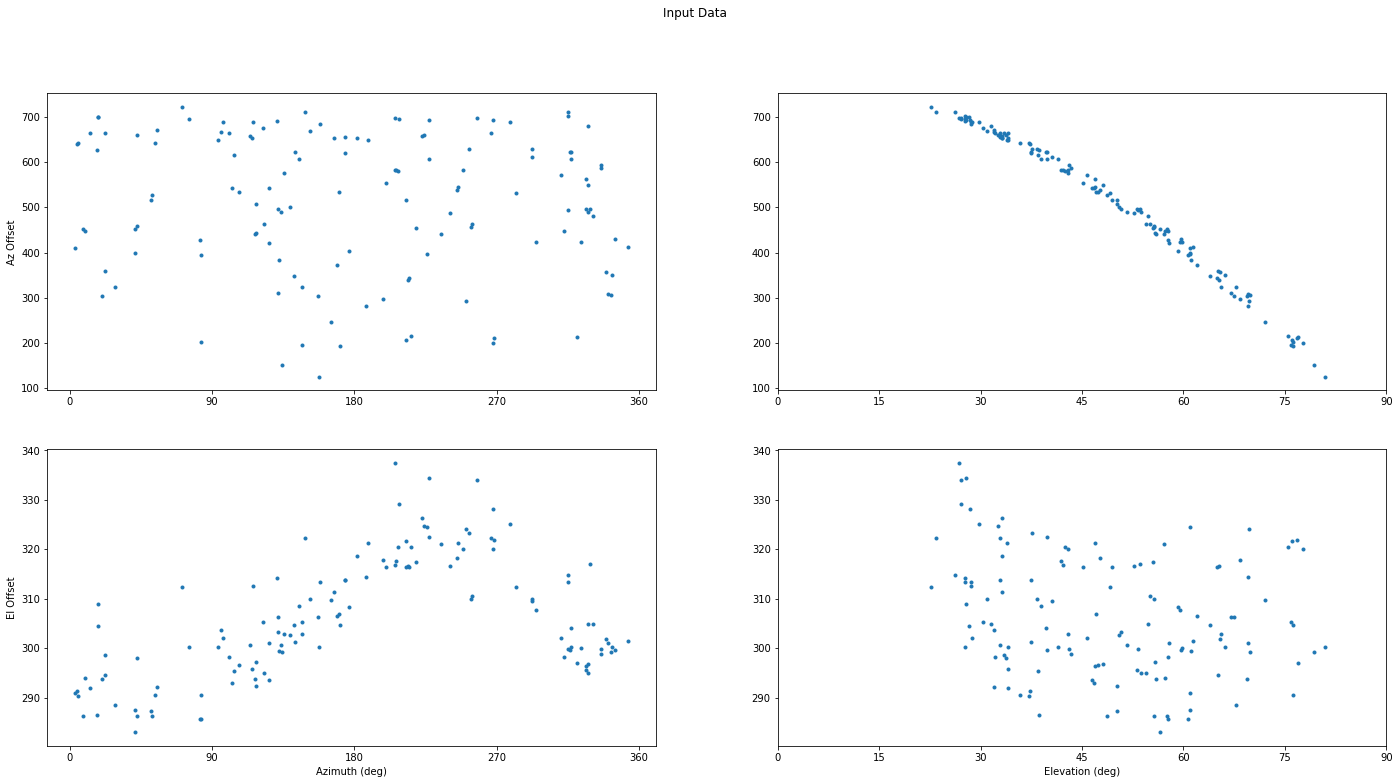

In [ ]:
import numpy as np
import csv
import matplotlib.pyplot as pl
import math

#Jordan's Section 

filename = 'PointingData.csv'
f = open(filename, 'r') #open file
r = csv.reader(f) #create csv reader

#create lists
AzList = []
ElList = []
AzOffList = []
AzErrList = []
ElOffList = []
ElErrList = []
# read each row and get data from columns
for row in r:
    AzList.append(eval(row[4]))
    ElList.append(eval(row[5]))
    AzOffList.append(eval(row[6]))
    AzErrList.append(eval(row[7]))
    ElOffList.append(eval(row[8]))
    ElErrList.append(eval(row[9]))

# create numpy arrays
az = np.array(AzList)
el = np.array(ElList)
azoff = np.array(AzOffList)
azerr = np.array(AzErrList)
eloff = np.array(ElOffList)
elerr = np.array(ElErrList)

# make graphs of initial pointing offsets
pl.ion()
# plot the input measurements
pl.figure(1)

# Subplots
pl.figure(figsize = (24,12))
ax1 = pl.subplot(2,2,1)
pl.plot(az,azoff,'.')
pl.ylabel('Az Offset')
ax1.set_xticks([0,90.,180.,270.,360.])
ax2 = pl.subplot(2,2,3)
pl.plot(az,eloff,'.')
pl.ylabel('El Offset')
pl.xlabel('Azimuth (deg)')
ax2.set_xticks([0,90.,180.,270.,360.])
ax3 = pl.subplot(2,2,2)
pl.plot(el,azoff,'.')
ax3.set_xticks([0,15.,30.,45.,60.,75.,90.])
ax4 = pl.subplot(2,2,4)
pl.plot(el,eloff,'.')
ax4.set_xticks([0,15.,30.,45.,60.,75.,90.])
pl.xlabel('Elevation (deg)')
pl.suptitle('Input Data')

Text(0.5, 0.98, 'Input Data Histograms')

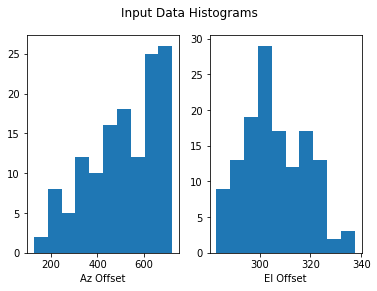

In [ ]:
#Offset Histogram
pl.figure(2)
pl.subplot(1, 2, 1)
pl.hist(azoff)
pl.xlabel('Az Offset')
pl.subplot(1, 2, 2)
pl.hist(eloff)
pl.xlabel('El Offset')
pl.suptitle('Input Data Histograms')

In [ ]:
#Standard Deviation
print('Standard Deviation of Azimuth measurements =%6.1f arcsec'%(np.std(azoff)))
print('Standard Deviation of Elevation measurements =%6.1f arcsec'%(np.std(eloff)))

Standard Deviation of Azimuth measurements = 153.0 arcsec
Standard Deviation of Elevation measurements =  12.0 arcsec


In [ ]:
#number of parameters
npar = 5

#number of observations
nobs = len(az)


azRad = az*np.pi/180
elRad = el*np.pi/180

MA = np.column_stack( (np.ones(nobs),
                      np.sin(elRad),
                      np.cos(elRad),
                      np.sin(elRad)*np.sin(azRad),
                      np.sin(elRad)*np.cos(azRad)))
ME = np.column_stack((np.ones(nobs),
                      np.cos(elRad)/np.sin(elRad),
                      np.cos(elRad),
                      np.cos(azRad),
                      np.sin(azRad)))

#Matrix transpose multiplied by the matrix
MATMA = np.dot(MA.transpose(),MA)
METME = np.dot(ME.transpose(),ME)

#Matrix transpose multiplied by the offset
MATD = np.dot(MA.transpose(),azoff)
METD = np.dot(ME.transpose(),eloff)

#Inverse of matrix transpose multiplied by the matrix
MATMAINV = np.linalg.inv(MATMA)
METMEINV = np.linalg.inv(METME)

#Calculation of least sqaures fit 
PA = np.dot(MATMAINV,MATD)
PE = np.dot(METMEINV,METD)

#Azimuth residuals and Root Mean Square(RMS)
RA = azoff - np.dot(MA,PA)
ChiSqA = np.dot(RA.transpose(),RA)
RMS_A = math.sqrt(ChiSqA/nobs)

#Elevation residuals and Root Mean Square(RMS)
RE = eloff - np.dot(ME,PE)
ChiSqE = np.dot(RE.transpose(),RE)
RMS_E = math.sqrt(ChiSqE/nobs)

#Covariance matrices
CovA = MATMAINV*ChiSqA/(nobs-npar)
CovE = METMEINV*ChiSqE/(nobs-npar)


In [ ]:
#Azimuth Solution
print ('Azimuth Solution')
print ('         arcsec                   deg                    rad')
for i in range(npar):
    print ('%d %6.1f +/- %5.1f      %9.5f +/- %7.5f       %10.6f +/- %8.6f'%(i,PA[i],math.sqrt(CovA[i][i]),PA[i]/3600.,math.sqrt(CovA[i][i])/3600.,PA[i]/206265.,math.sqrt(CovA[i][i])/206265.))
print ('FIT RMS = %6.1f arcsec'%(RMS_A))
print ('Residuals: Mean= %6.1f STD= %6.1f arcsec'%(np.mean(RA),np.std(RA)))

# print elevation solution
print ('Elevation Solution')
print ('         arcsec                   deg                    rad')
for i in range(npar):
    print ('%d %6.1f +/- %5.1f      %9.5f +/- %7.5f       %10.6f +/- %8.6f'%(i,PE[i],math.sqrt(CovE[i][i]),PE[i]/3600.,math.sqrt(CovE[i][i])/3600.,PE[i]/206265.,math.sqrt(CovE[i][i])/206265.))
print ('FIT RMS = %6.1f arcsec'%(RMS_E))
print ('Residuals: Mean= %6.1f STD= %6.1f arcsec'%(np.mean(RE),np.std(RE)))

# print reduced chi-squares
print (' ')
print ('Reduced Chi Square for Azimuth   (assuming 1 arcsec errors) = %f'%(ChiSqA/(nobs-npar)))
print ('Reduced Chi Square for Elevation (assuming 1 arcsec errors) = %f'%(ChiSqE/(nobs-npar)))

Azimuth Solution
         arcsec                   deg                    rad
0   -0.3 +/-   5.2       -0.00009 +/- 0.00144        -0.000002 +/- 0.000025
1   25.0 +/-   4.1        0.00695 +/- 0.00115         0.000121 +/- 0.000020
2  774.1 +/-   3.5        0.21502 +/- 0.00096         0.003753 +/- 0.000017
3   -7.3 +/-   0.4       -0.00203 +/- 0.00010        -0.000035 +/- 0.000002
4   14.4 +/-   0.3        0.00401 +/- 0.00009         0.000070 +/- 0.000002
FIT RMS =    2.0 arcsec
Residuals: Mean=   -0.0 STD=    2.0 arcsec
Elevation Solution
         arcsec                   deg                    rad
0  309.5 +/-   1.6        0.08597 +/- 0.00045         0.001500 +/- 0.000008
1   22.2 +/-   1.9        0.00617 +/- 0.00054         0.000108 +/- 0.000009
2  -41.3 +/-   5.2       -0.01148 +/- 0.00143        -0.000200 +/- 0.000025
3   -9.6 +/-   0.5       -0.00266 +/- 0.00013        -0.000046 +/- 0.000002
4  -12.4 +/-   0.5       -0.00344 +/- 0.00014        -0.000060 +/- 0.000002
FIT RMS =    3.

Text(0.5, 0.98, 'Residuals to Model Fit')

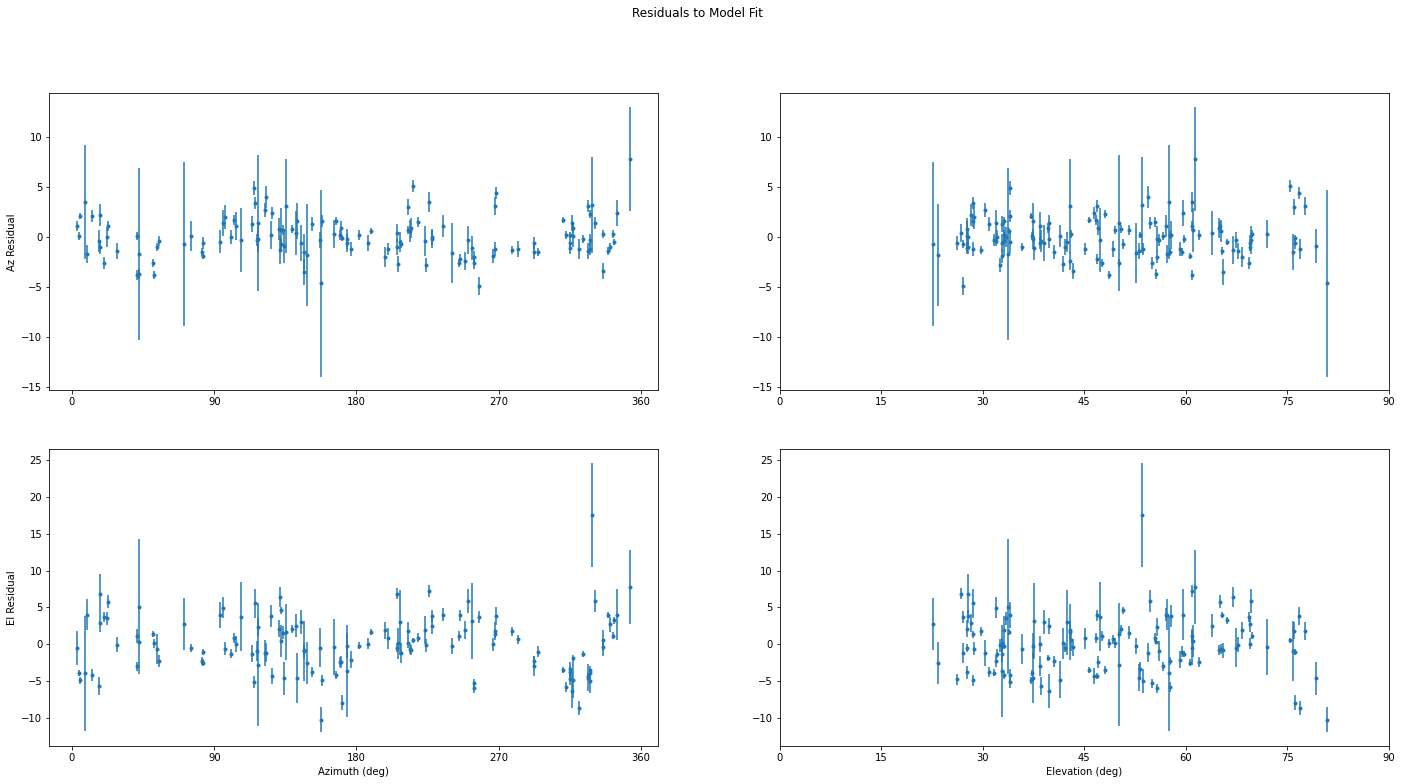

In [ ]:
pl.figure(figsize = (24,12))
ax1 = pl.subplot(2,2,1)
pl.errorbar(az,RA,azerr,fmt='.')
pl.ylabel('Az Residual')
ax1.set_xticks([0,90.,180.,270.,360.])
ax2 = pl.subplot(2,2,3)
pl.errorbar(az,RE,elerr,fmt='.')
pl.ylabel('El Residual')
pl.xlabel('Azimuth (deg)')
ax2.set_xticks([0,90.,180.,270.,360.])
ax3 = pl.subplot(2,2,2)
pl.errorbar(el,RA,azerr,fmt='.')
ax3.set_xticks([0,15.,30.,45.,60.,75.,90.])
ax4 = pl.subplot(2,2,4)
pl.errorbar(el,RE,elerr,fmt='.')
ax4.set_xticks([0,15.,30.,45.,60.,75.,90.])
pl.xlabel('Elevation (deg)')
pl.suptitle('Residuals to Model Fit')

Text(0.5, 0.98, 'Residual Histograms')

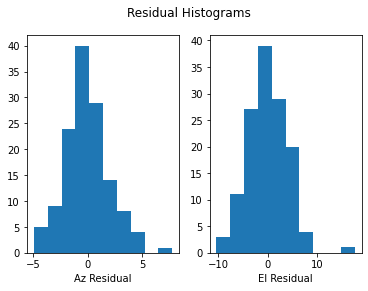

In [ ]:
# histograms
pl.figure(4)
pl.subplot(1,2,1)
pl.hist(RA)
pl.xlabel('Az Residual')
pl.subplot(1,2,2)
pl.hist(RE)
pl.xlabel('El Residual')
pl.suptitle('Residual Histograms')